#### Global Development Clustering

#### Project Name : Global-Development-Clustering

##### 1. Objective: Cluster countries based on socio-economic indicators to uncover development patterns using unsupervised learning.
##### 2. Clustering Methods: Implements KMeans, DBSCAN, and Hierarchical (Agglomerative) clustering.
##### 3. Dataset: World Development Indicators (country-wise data).

##### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
#---- Load the dataset
import pandas as pd
df=pd.read_csv("World_development_mesurement.csv")
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [3]:
# It provides the number of Rows and Columns in the dataset
df.shape

(2704, 25)

In [4]:
# It provides the number of Rows and Columns in the dataset
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [5]:
# It provides information about  the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [6]:
# It provide the top 5 rows in the dataset
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [7]:
# It provide the last 5 rows in the dataset
df.tail()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"
2703,0.011,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,NaN,1,0.206,0.641,0.152,105275,0.949,NaN,NaN


In [8]:
# --- Drop unwanted column ---
df = df.drop(columns=['Number of Records'], errors="ignore")

In [9]:
# --- Encode Country ---
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country'])
df['Country_encoded'] = df['Country_encoded'].astype(float)
df.drop(['Country'], axis=1, inplace=True)

In [10]:
df['Country_encoded']

0         2.0
1         5.0
2        20.0
3        25.0
4        29.0
        ...  
2699    193.0
2700    198.0
2701    199.0
2702    202.0
2703    204.0
Name: Country_encoded, Length: 2704, dtype: float64

In [11]:
# --- Clean symbols ---
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(r"[$,%]", "", regex=True)
    try:
        df[col] = df[col].astype(float)
    except:
        pass

In [12]:
# checking null values
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
Country_encoded              0
dtype: int64

In [13]:
# Fill all at once by using fillna method
df.fillna(0, inplace=True)
df.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
Country_encoded           0
dtype: int64

In [14]:
# Basics statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth Rate,2704.0,2.171524e-02,1.202563e-02,0.0,1.200000e-02,1.900000e-02,3.000000e-02,5.300000e-02
Business Tax Rate,2704.0,2.576919e+01,3.847562e+01,0.0,0.000000e+00,1.540000e+01,4.230000e+01,3.391000e+02
CO2 Emissions,2704.0,1.118353e+05,5.491031e+05,0.0,1.500000e+02,3.131500e+03,4.256200e+04,8.286892e+06
Days to Start Business,2704.0,2.541383e+01,4.957598e+01,0.0,0.000000e+00,1.200000e+01,3.425000e+01,6.940000e+02
Ease of Business,2704.0,6.491124e+00,2.789788e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.890000e+02
Energy Usage,2704.0,5.098660e+04,2.143112e+05,0.0,0.000000e+00,3.521000e+03,2.347650e+04,2.727728e+06
GDP,2704.0,2.433624e+11,1.087427e+12,0.0,2.025005e+09,1.201895e+10,9.101825e+10,1.624460e+13
Health Exp % GDP,2704.0,5.683654e-02,3.210451e-02,0.0,3.900000e-02,5.700000e-02,7.600000e-02,2.250000e-01
Health Exp/Capita,2704.0,7.098173e+02,1.409925e+03,0.0,2.800000e+01,1.440000e+02,5.512500e+02,9.908000e+03
Hours to do Tax,2704.0,1.581838e+02,2.487362e+02,0.0,0.000000e+00,7.600000e+01,2.560000e+02,2.600000e+03


In [15]:
# Correlation
z=df.corr(numeric_only=True)
z.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
Birth Rate,1.000000,0.201025,-0.121742,0.167147,0.086222,-0.136149,-0.154064,-0.013275,-0.376488,0.095861,...,-0.118189,-0.455516,0.903803,0.033284,-0.508577,-0.032241,-0.585338,-0.227476,-0.231617,0.033689
Business Tax Rate,0.201025,1.000000,0.031879,0.180822,0.146479,0.045976,0.060810,0.203665,0.018965,0.471708,...,-0.000198,0.164494,0.170223,0.099399,0.020675,0.067415,-0.093629,0.064660,0.064676,-0.088091
CO2 Emissions,-0.121742,0.031879,1.000000,-0.012602,-0.047406,0.908724,0.693043,0.153770,0.208112,0.065399,...,0.100687,0.026745,-0.093842,0.115909,0.149005,0.655054,0.075714,0.590624,0.561573,0.031533
Days to Start Business,0.167147,0.180822,-0.012602,1.000000,0.067143,-0.016139,-0.029193,0.047453,-0.096780,0.269211,...,0.002017,0.004217,0.195991,0.083835,-0.079485,0.028215,-0.091468,-0.056109,-0.050174,0.028914
Ease of Business,0.086222,0.146479,-0.047406,0.067143,1.000000,-0.049201,-0.009879,0.043278,-0.041972,0.150350,...,-0.000569,0.151784,0.083652,0.025972,-0.053227,0.015914,-0.062139,-0.026049,-0.019104,-0.008808


##### Information about the coreelation

In [16]:
# It tells us how two things are related.
# If one goes up and the other also goes up → positive correlation.
# If one goes up and the other goes down → negative correlation.
# If they don’t affect each other → no correlation.

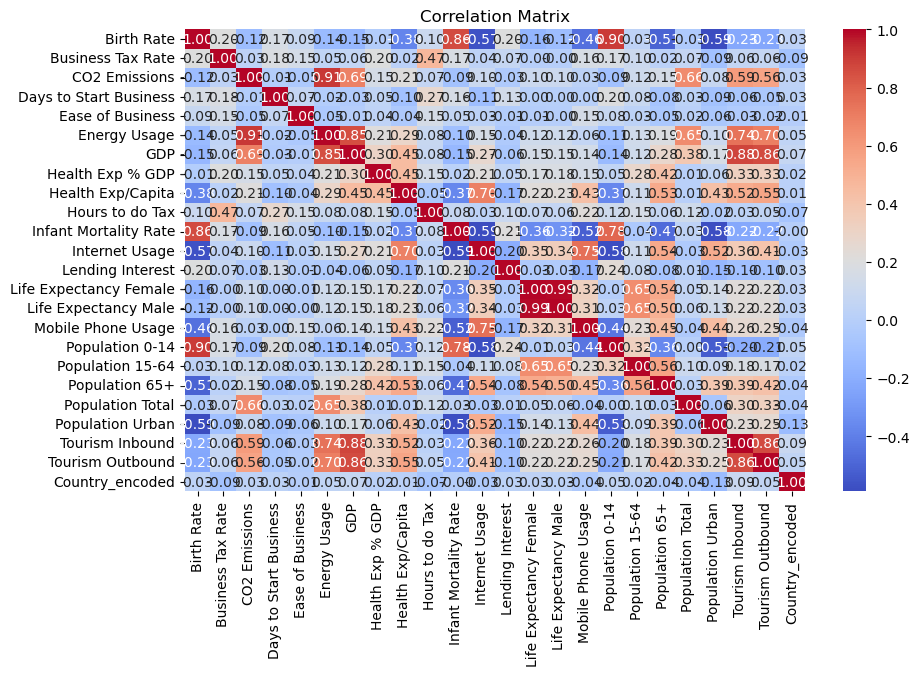

In [17]:
# Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(z, annot=True, fmt=".2f",cmap="coolwarm")
plt.title("Correlation Matrix",color="black")
plt.show()

#### Information about the Heatmap
1. There is a storng correlation between Birth Rate and Infant mortlaity rate
2. Infant mortlaity rate means no of babies who die before reaching one year of age out every 1000 live birth in a year
3. There is a storng correlation between Birth rate and Population, as Birth rate increases population also increases automatically
4. As Energy consumption increses,CO2 Emmision also increases
5. There is Negative correlation between birth rate and population total that means increase of children death in infant mortlaity

In [18]:
# More babies are born → more babies may die before age 1 (higher infant deaths).
# Infant mortality = number of babies who die before 1 year out of 1,000 born.
# More babies born → bigger population.
# Using more energy → more CO₂ emissions.
# Sometimes, high birth rates + high infant deaths → population doesn’t grow much.

In [19]:
# Make sure we only pick numeric columns from the dataframe
numerical_col = df.select_dtypes(include=[np.number]).columns
numerical_col

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'Country_encoded'],
      dtype='object')

##### Histograms for each  numerical columns

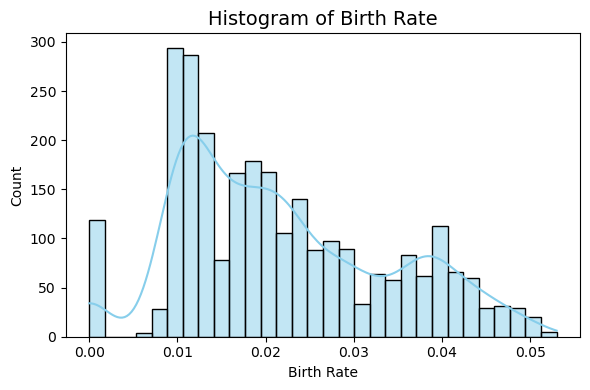

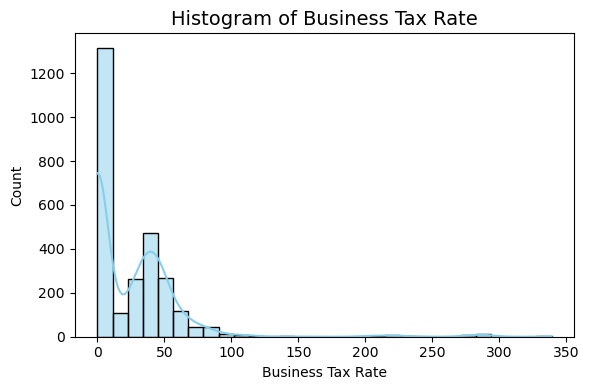

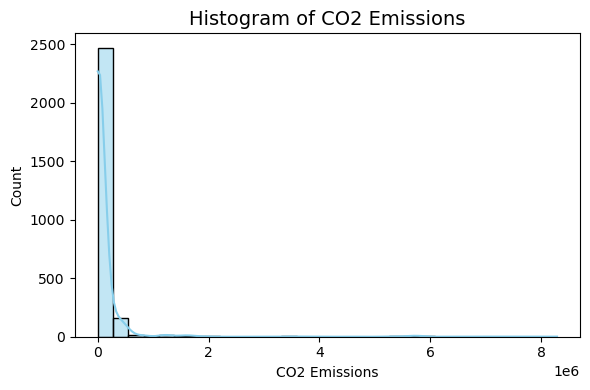

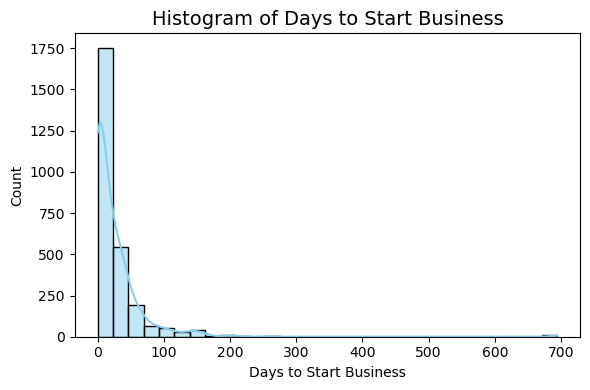

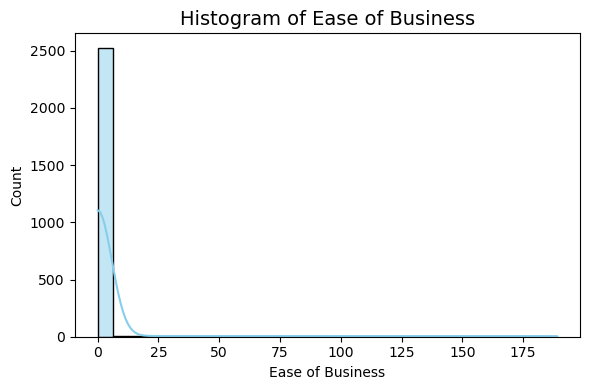

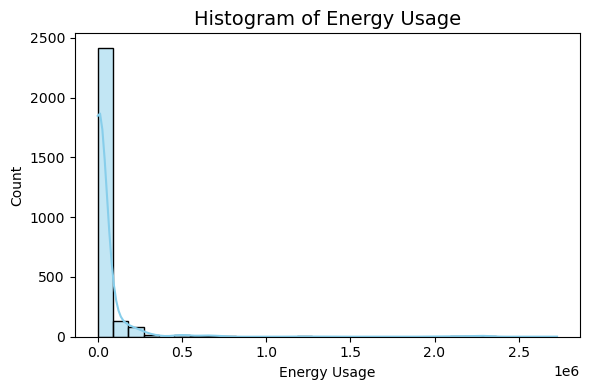

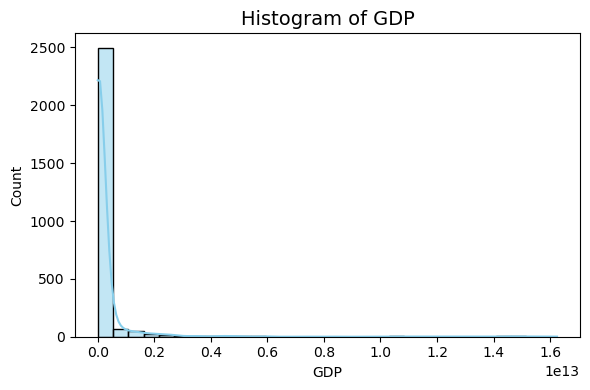

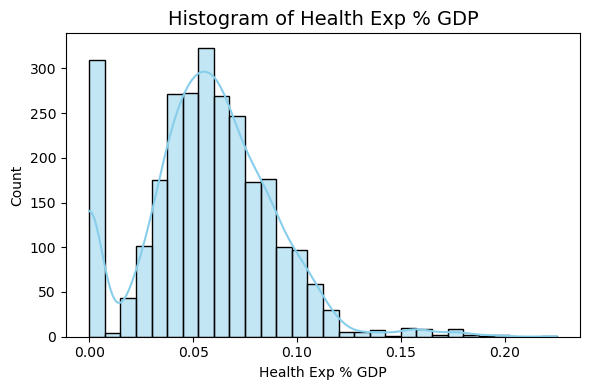

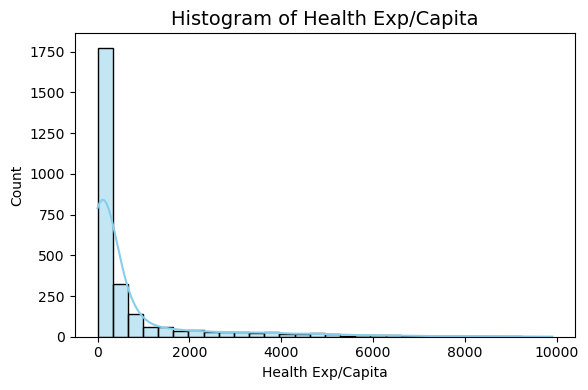

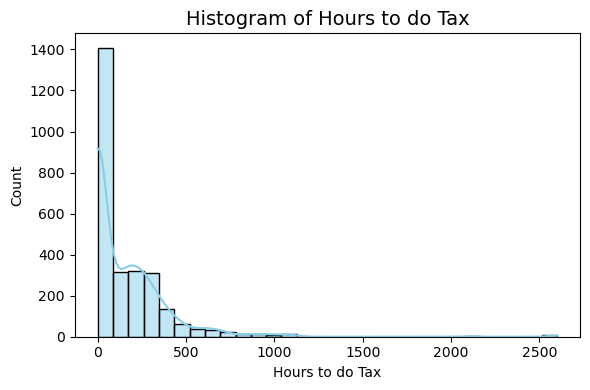

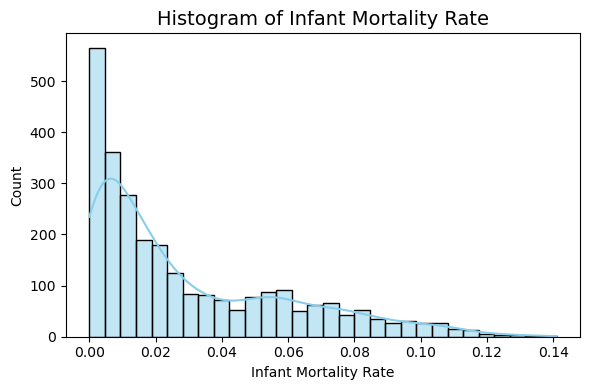

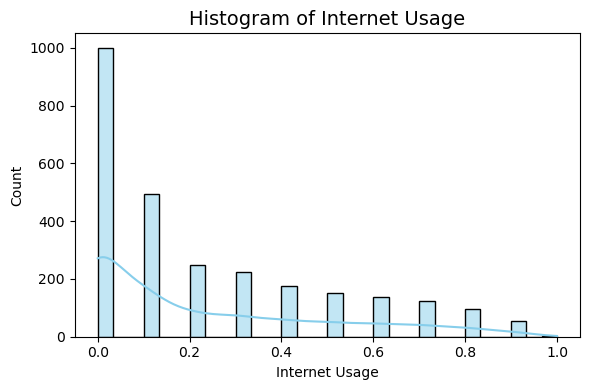

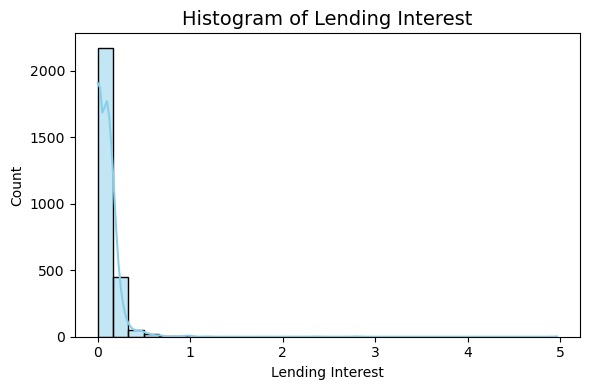

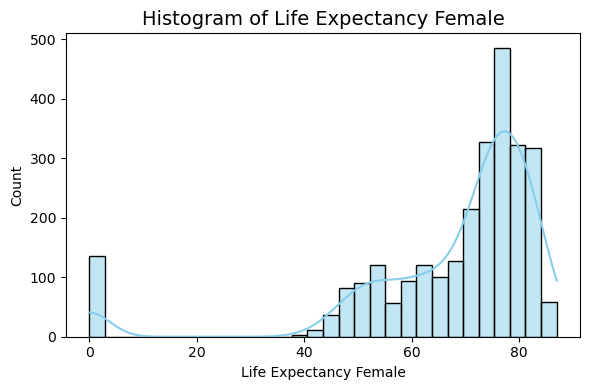

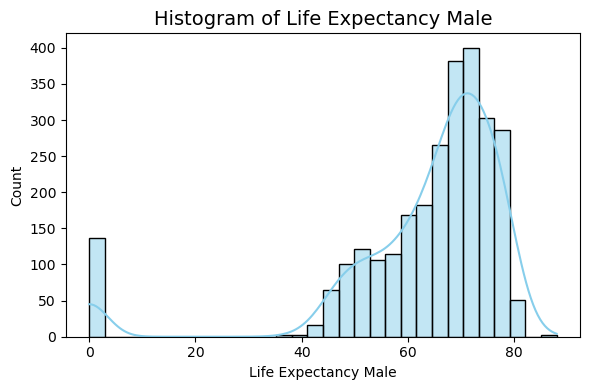

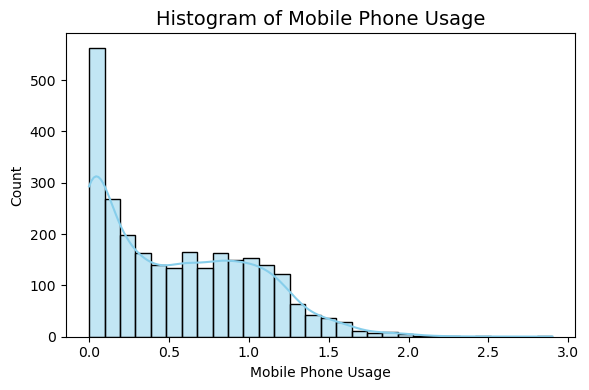

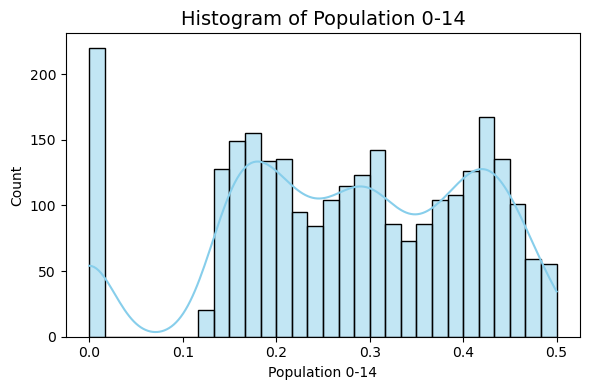

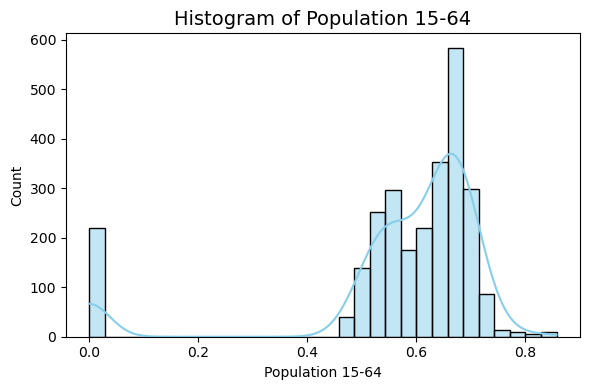

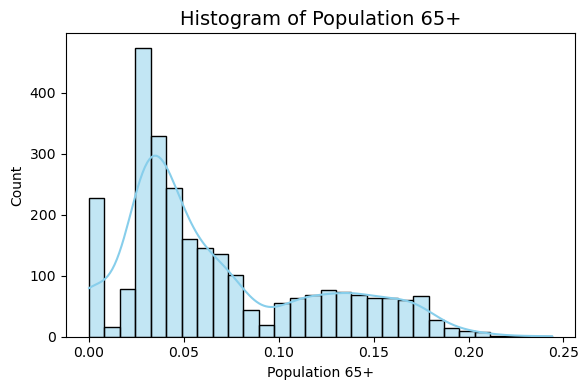

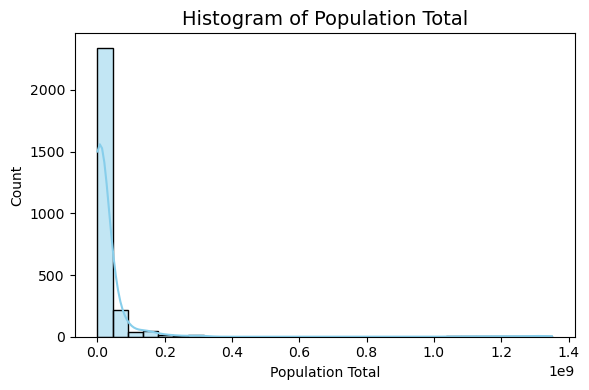

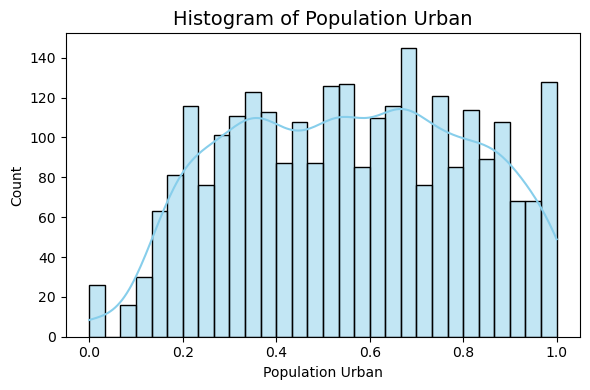

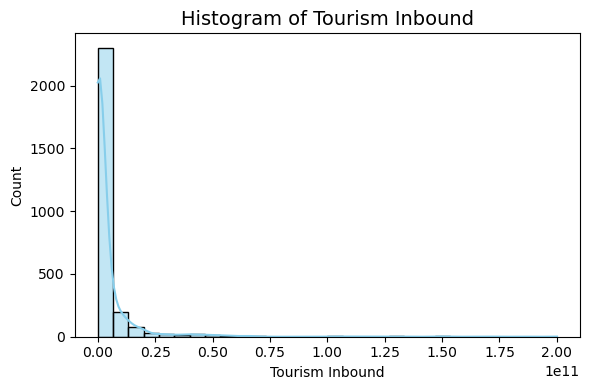

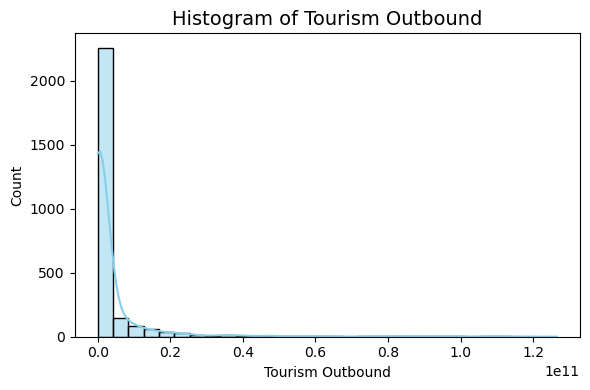

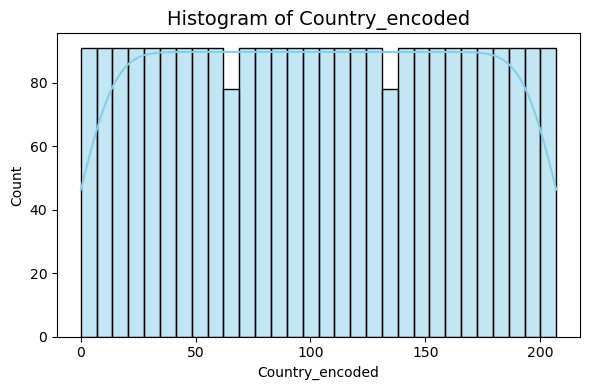

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')  # histogram + KDE
    plt.title(f"Histogram of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

##### Boxplots (Outlier detection)

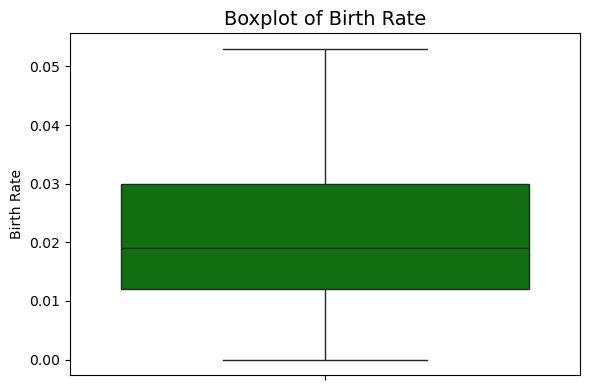

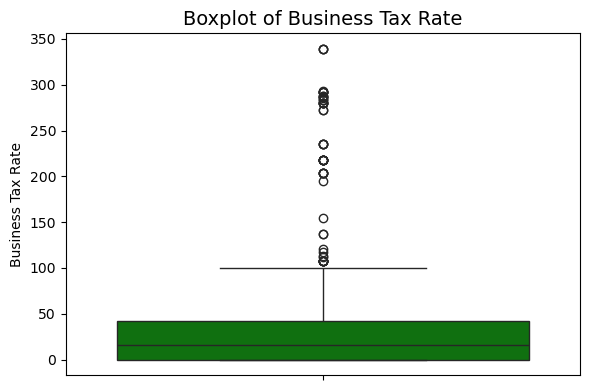

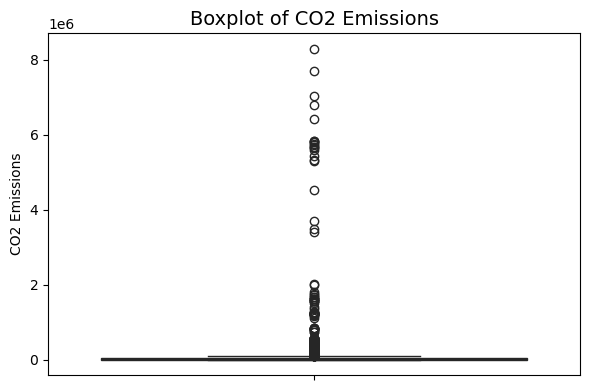

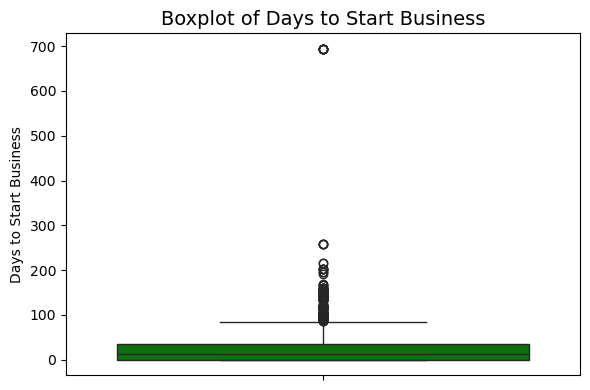

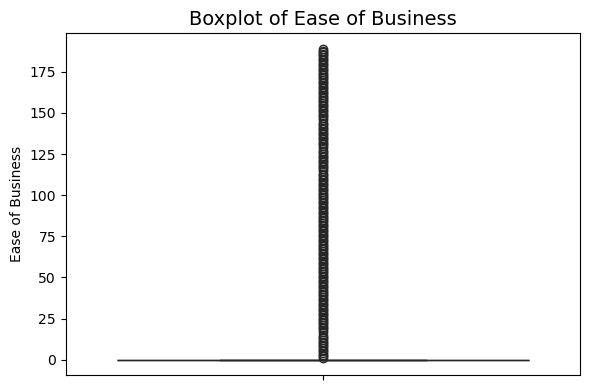

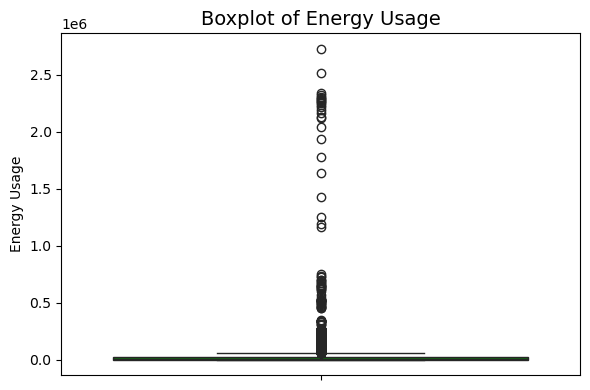

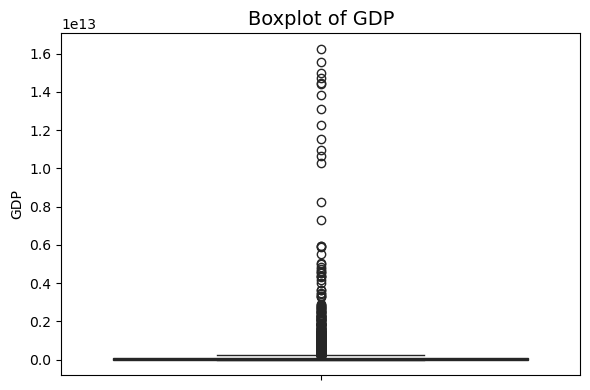

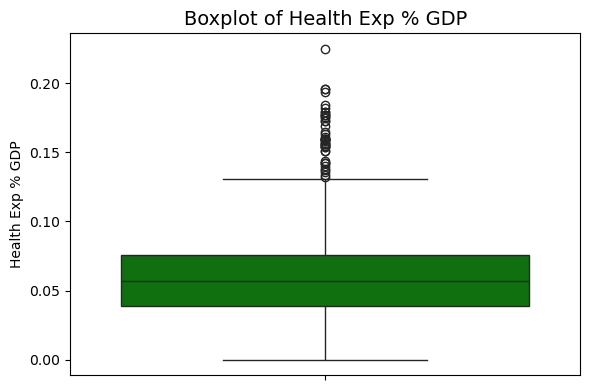

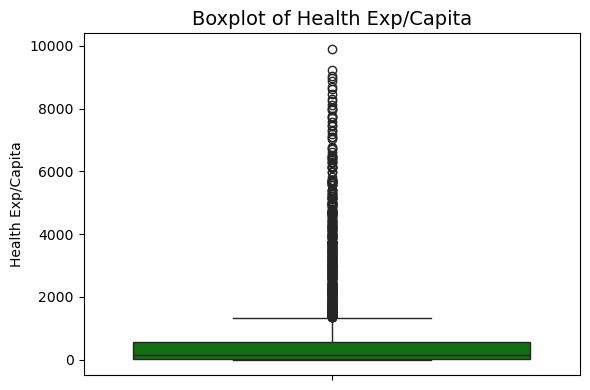

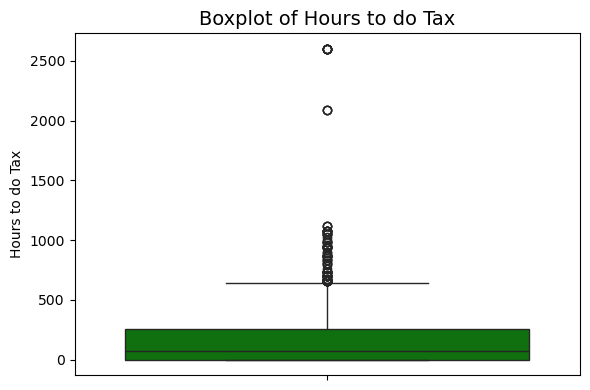

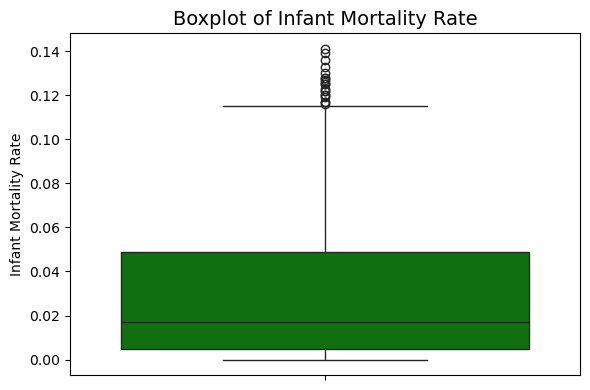

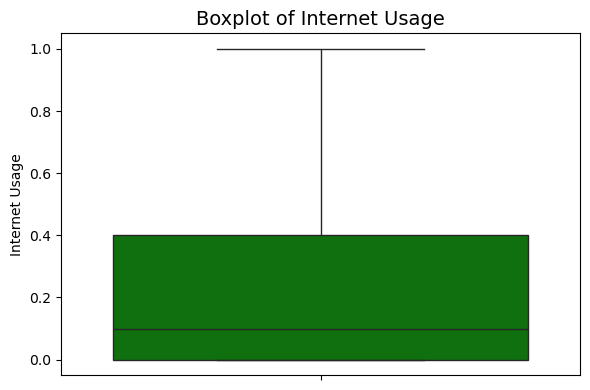

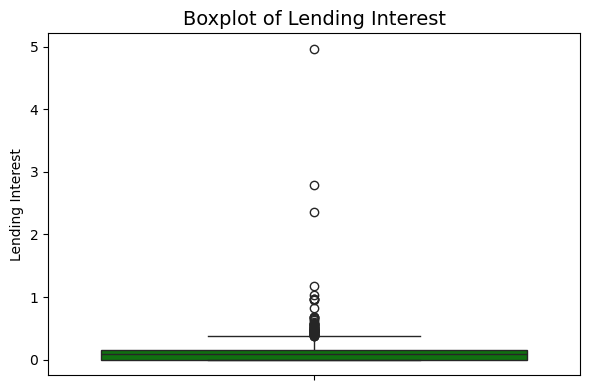

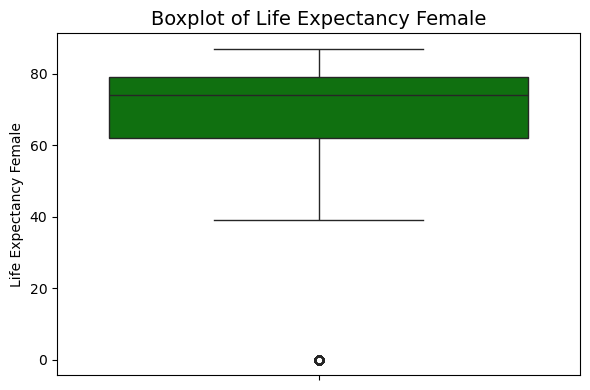

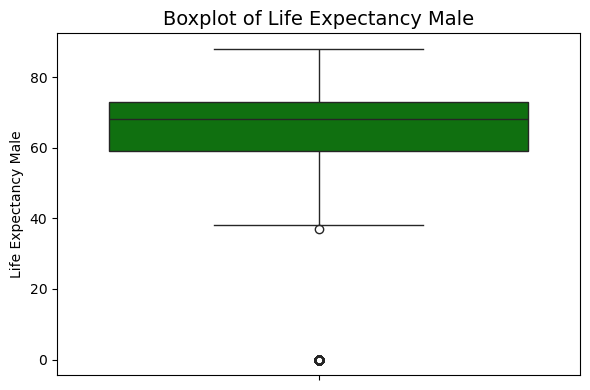

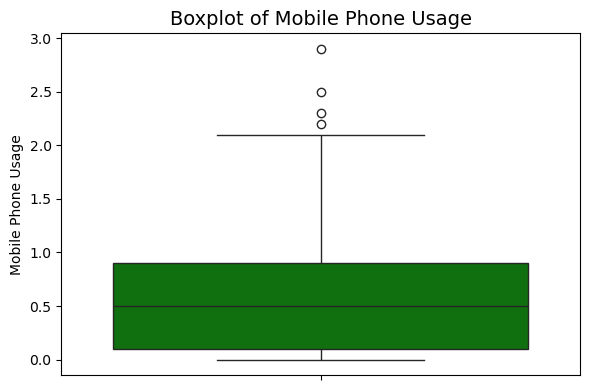

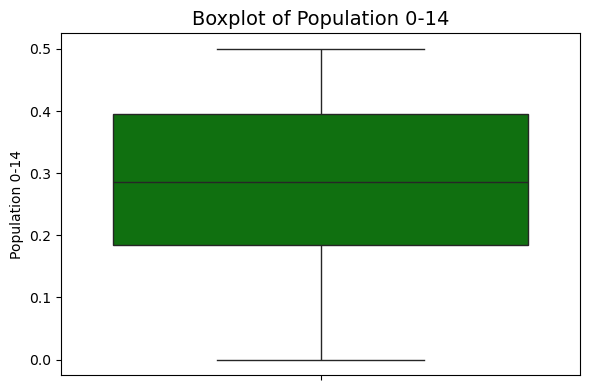

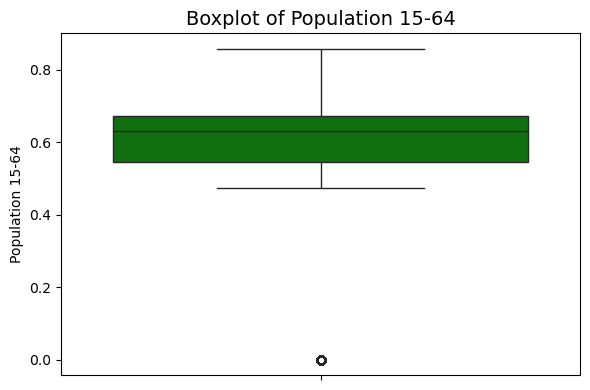

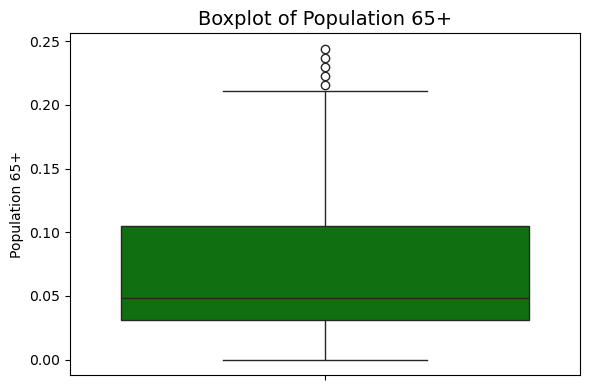

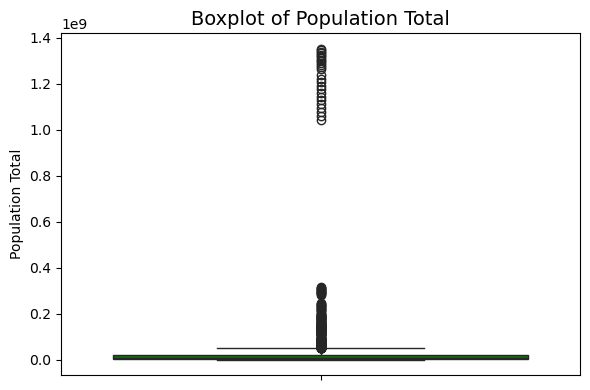

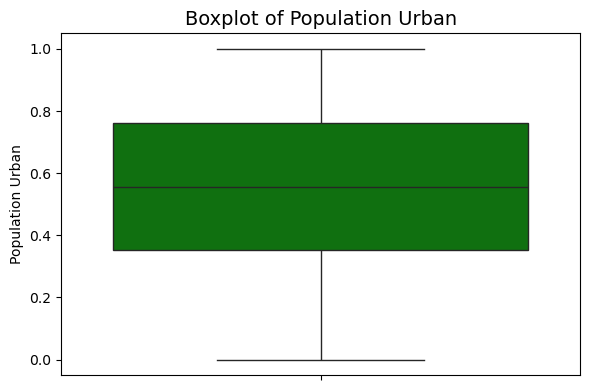

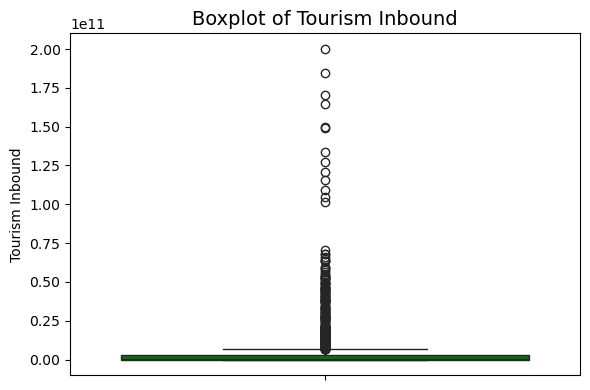

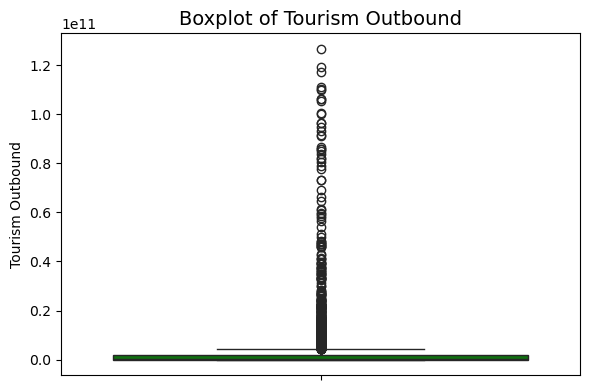

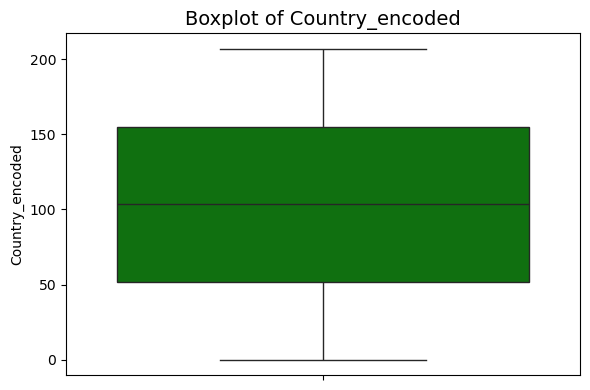

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col], color='green')  # boxplot
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.tight_layout()
    plt.show()

##### Feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_col])

In [23]:
# Feature Extraction
# Here our target variable is country so we dropped the contry column from the dataset
x= df.drop(columns=["Country_encoded"])
x.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,0.0,87931.0,0.0,0.0,26998.0,5.479006e+10,0.035,60.0,0.0,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0
1,0.050,0.0,9542.0,0.0,0.0,7499.0,9.129595e+09,0.034,22.0,0.0,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0
2,0.043,0.0,1617.0,0.0,0.0,1983.0,2.359122e+09,0.043,15.0,0.0,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0
3,0.027,0.0,4276.0,0.0,0.0,1836.0,5.788312e+09,0.047,152.0,0.0,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0
4,0.046,0.0,1041.0,0.0,0.0,0.0,2.610959e+09,0.051,12.0,0.0,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0


##### Model Building

##### K-Means
##### Using the elbow method to find the optimal number of clusters

In [24]:
# Model Building 
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [25]:
# wcss : ( within cluster sum of the squares )
# inertia means start the process
# k-means inertia measure how tightly the data points are cluster around the centriod
# How to chosose K- vlaue ( we are using Eblow method 

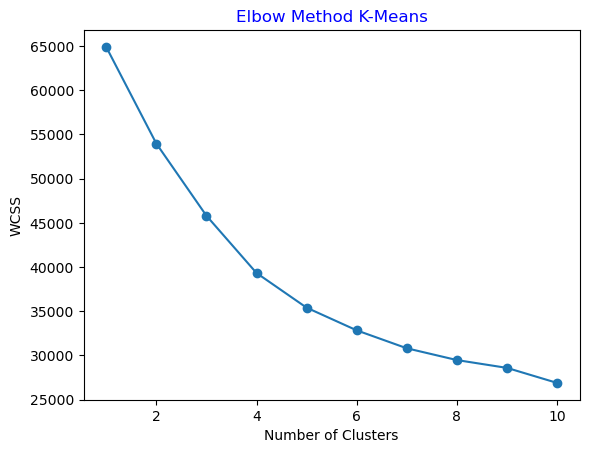

In [26]:
# Elbow Method K-Means
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss,marker='o')
plt.title("Elbow Method K-Means", color="blue")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [27]:
# Choose number of clusters based on elbow plot
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
k_labels = kmeans.fit_predict(df_scaled)
# Add cluster labels back to the original dataframe copy
df['KMeans Cluster'] = k_labels

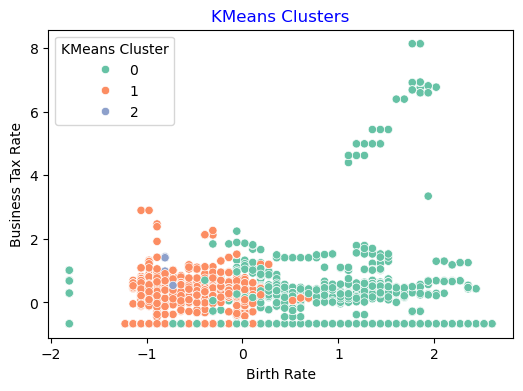

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], hue=df['KMeans Cluster'], palette='Set2')
plt.title("KMeans Clusters", color="blue")
plt.xlabel(numerical_col[0])
plt.ylabel(numerical_col[1])
plt.show()

##### Hierachical

In [29]:
# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(df_scaled, method='ward')

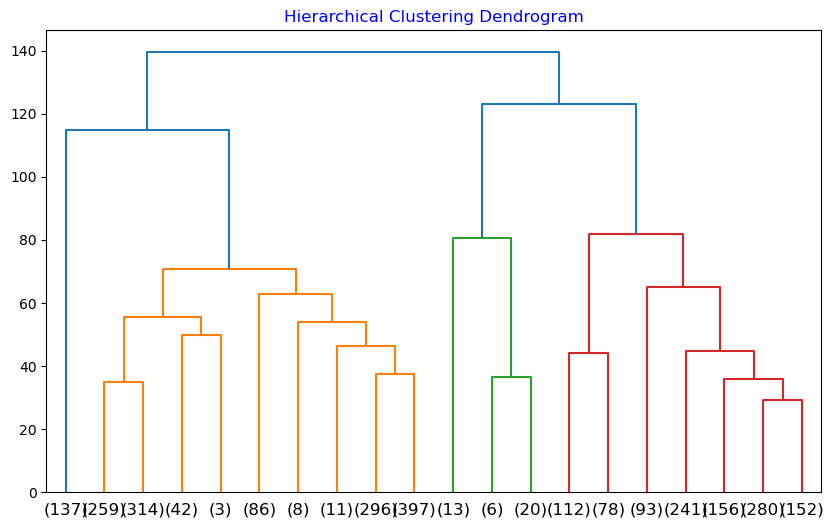

In [30]:
# Hierachical Dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode="lastp", p=20, show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram",color="blue")
plt.show()

In [31]:
# Perform hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
linkage_matrix = linkage(df_scaled, method='median')   # 'ward' works well, you used 'median' (can keep if needed)
df['Hierarchical Cluster'] = fcluster(linkage_matrix, t=5, criterion='maxclust')

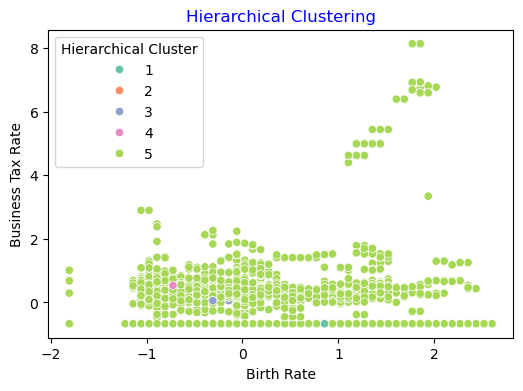

In [32]:
#  Hierachical Scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['Hierarchical Cluster'], palette='Set2')
plt.title("Hierarchical Clustering", color="blue")
plt.xlabel(numerical_col[0])
plt.ylabel(numerical_col[1])
plt.show()

##### DBSCAN

In [33]:
from sklearn.cluster import  DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)  #epsilon - radius that defines neighbour hood around each data point
db_labels = db.fit_predict(df_scaled)
# Add DBSCAN labels
df['DBSCAN_Cluster'] = db_labels

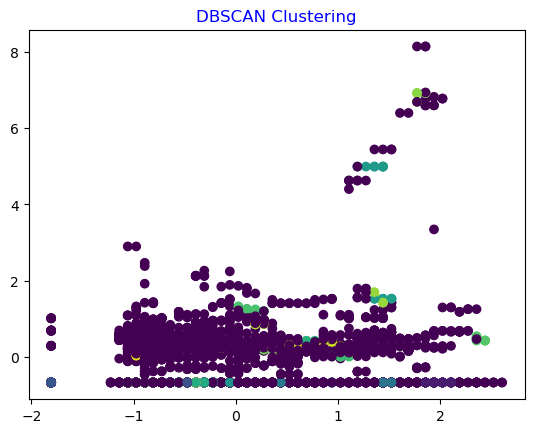

In [34]:
# Dbscan scatter plot
import matplotlib.pyplot as plt
plt.scatter(df_scaled[:, 0], df_scaled[:, 1],c=db_labels)
plt.title("DBSCAN Clustering",color="blue")
plt.show()

##### Model Evaluation

In [35]:
# K-Means Clustering
optimal_k =4 # Example, set based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
k_labels = kmeans.fit_predict(df_scaled)

# Silhouette Score for K-Means
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(df_scaled,k_labels)

In [36]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
linkage_matrix = linkage(df_scaled, method='median')  
df['Hierarchical Cluster'] = fcluster(linkage_matrix, t=5, criterion='maxclust')

# Silhouette Score for Hierarchical
from sklearn.metrics import silhouette_score
silhouette_hierarchical = silhouette_score(df_scaled,df['Hierarchical Cluster'])

In [37]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Silhouette Score for DBSCAN
try:
    silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)
except ValueError:
    silhouette_dbscan = "Silhouette score could not be calculated for DBSCAN due to noise or single cluster."
     

In [38]:
# Print Silhouette Scores
print("Silhouette Scores:")
print(f"K-Means: {silhouette_kmeans}")
print(f"Hierarchical: {silhouette_hierarchical}")
print(f"DBSCAN: {silhouette_dbscan}")

Silhouette Scores:
K-Means: 0.24446558983162162
Hierarchical: 0.6005067957144427
DBSCAN: -0.36966983095811196


##### Best Method 

In [39]:
# Find the best method based on the highest Silhouette Score
best_method = max(silhouette_kmeans,silhouette_hierarchical,silhouette_dbscan if 'dbscan_sil_score' in locals() else float('-inf'))

# Print the best method based on Silhouette Score
if best_method ==silhouette_kmeans:
    selected_labels = KMeans_Cluster
    print("Best method: KMeans Clustering")
elif best_method == silhouette_hierarchical:
    print("Best method: Hierarchial Clustering")
else:
    print("Best method:DBSCAN ")

Best method: Hierarchial Clustering


##### Principle Component Analysis-PCA

In [40]:
# PCA for Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA()
x_scaled = pca.fit_transform(df_scaled)
pc_components = pca.components_  # This gives you the principal components
df_scaled = pc_components[:,:15]  # Select the first 15 principal components   

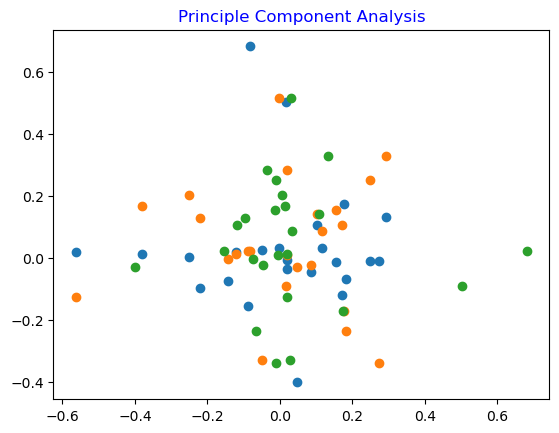

In [41]:
# Plot between PCA's
import matplotlib.pyplot as plt
x=pc_components[:,0]
y=pc_components[:,1]
z=pc_components[:,2]
plt.title("Principle Component Analysis",color="blue")
plt.scatter(x,y)
plt.scatter(x,z)
plt.scatter(y,z)
plt.show()

##### The below link is the app link

##### https://project-global-development-clustering-cunphvmqqnshq5qnndz2a3.streamlit.app/